In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving signal_representation.py to signal_representation.py


{'signal_representation.py': b'# -*- coding: utf-8 -*-\n"""signal_representation.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1pn9pvXLux8tQC71-CunZSEsrD2sOkPlg\n"""\n\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nfrom scipy.signal import stft\nimport os\nimport pywt\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.signal import stft, periodogram\n\nclass SpectrogramPlotter:\n    def __init__(self, signals, fs, nperseg):\n        self.signals = signals\n        self.fs = fs\n        self.nperseg = nperseg\n\n    def plot_spectrogram(self):\n        f, t, Zxx = stft(self.signals, fs=self.fs, nperseg=self.nperseg, window = (\'hann\'))\n        \n        fig, axs = plt.subplots(2, 5, figsize=(15, 6))\n        axs = axs.ravel()\n        for i in range(self.signals.sh

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.signal import stft
from scipy import signal
import sys
import os
from scipy.signal import spectrogram
import pywt


In [ ]:
import signal_representation

In [ ]:
from signal_representation import SpectrogramPlotter
from signal_representation import ScalogramPlotter


In [ ]:
from signal_representation import SynchrosqueezedTransform

In [ ]:
flow = pd.read_excel('/content/drive/MyDrive/spectrogram/flow.xlsx')
volume = pd.read_excel('/content/drive/MyDrive/spectrogram/volume.xlsx')
pressure = pd.read_excel('/content/drive/MyDrive/spectrogram/pressure.xlsx')
flow = flow.T
volume = volume.T
pressure = pressure.T

I convert the signals into Spectrogram. I tested flow signals from 10 real patients and found that most of the high magnitudes were in the frequency range of 1-5 Hz. To confirm this, I plotted the power spectrum of the signals to get a clearer picture of the distribution of power across different frequencies.

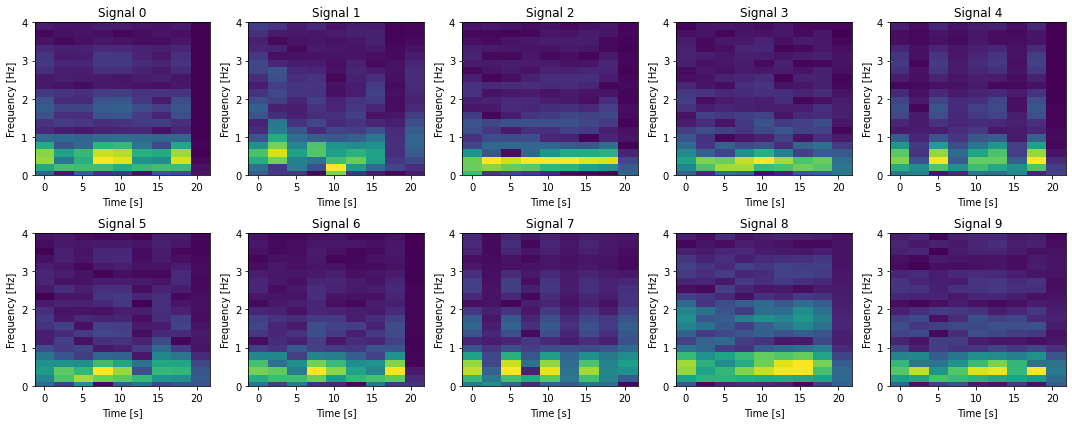

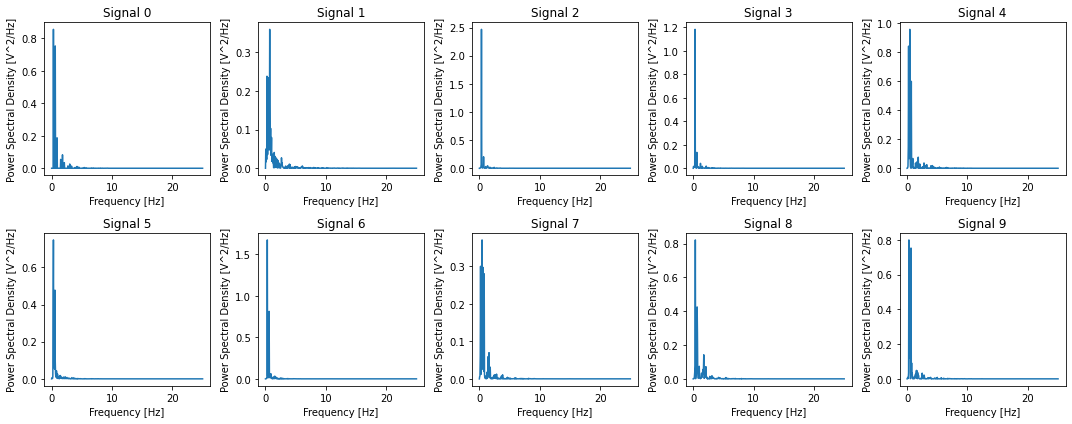

In [ ]:
signals = np.array(flow)
stft_process = SpectrogramPlotter(signals, fs=50, nperseg=256)
stft_process.plot_spectrogram()
stft_process.plot_power_spectrum()

I convert the flow signals from 10 real patients into scalograms using the Continuous Wavelet Transform (CWT) with 31 scales and the Morlet wavelet.

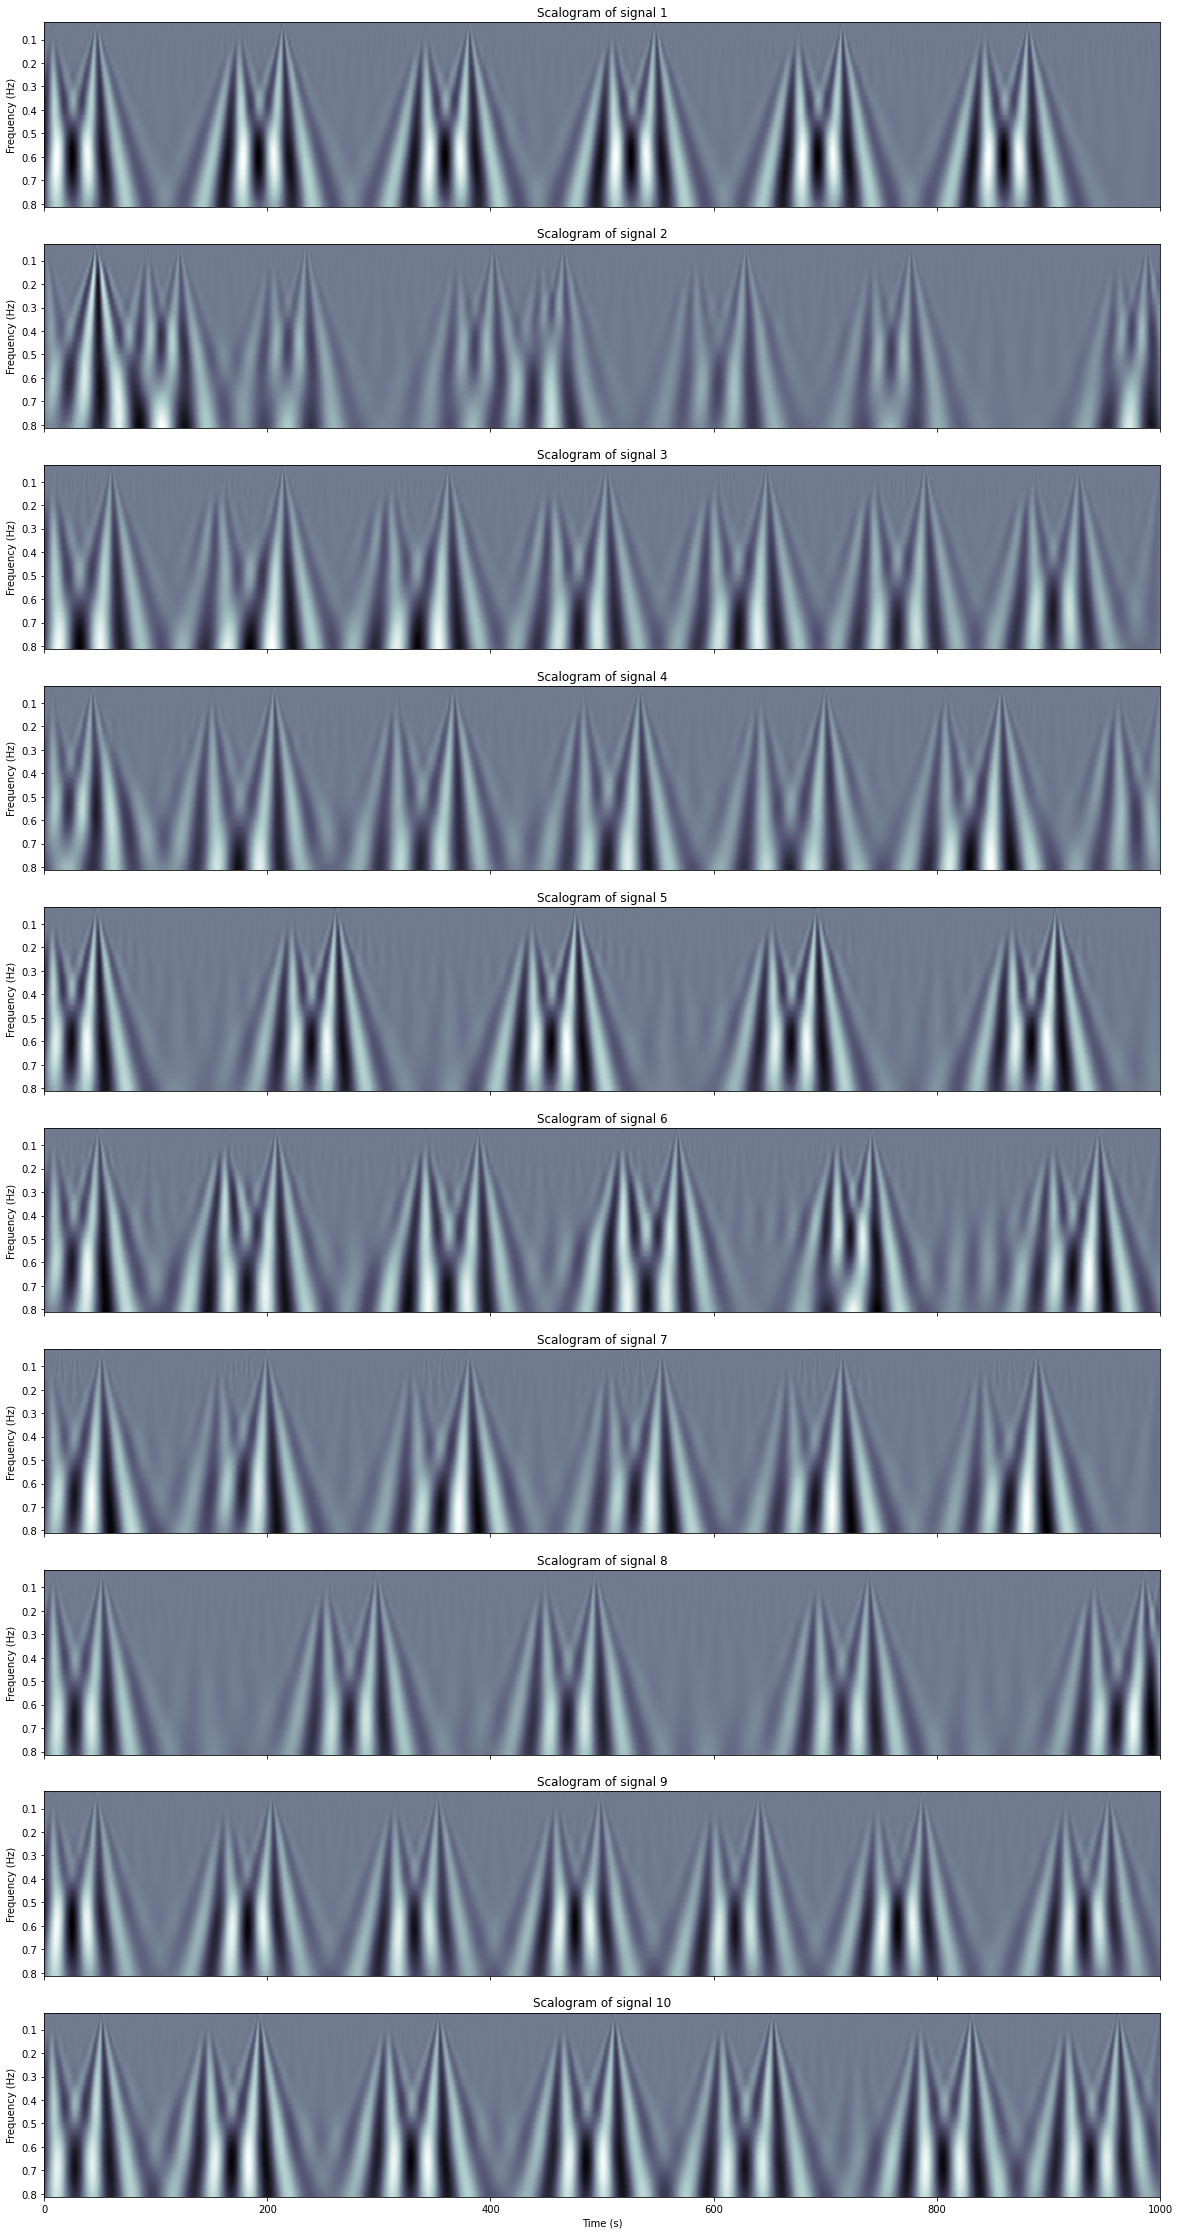

In [ ]:
signal = np.array(flow)
plotter = ScalogramPlotter(signal)

# Compute the CWT
plotter.compute_cwt()

# Plot the scalograms
plotter.plot_scalograms()


I perform the Synchrosqueezed Transform on all signals using the Discrete Wavelet Transform with a level of 3 and the db1 wavelet.

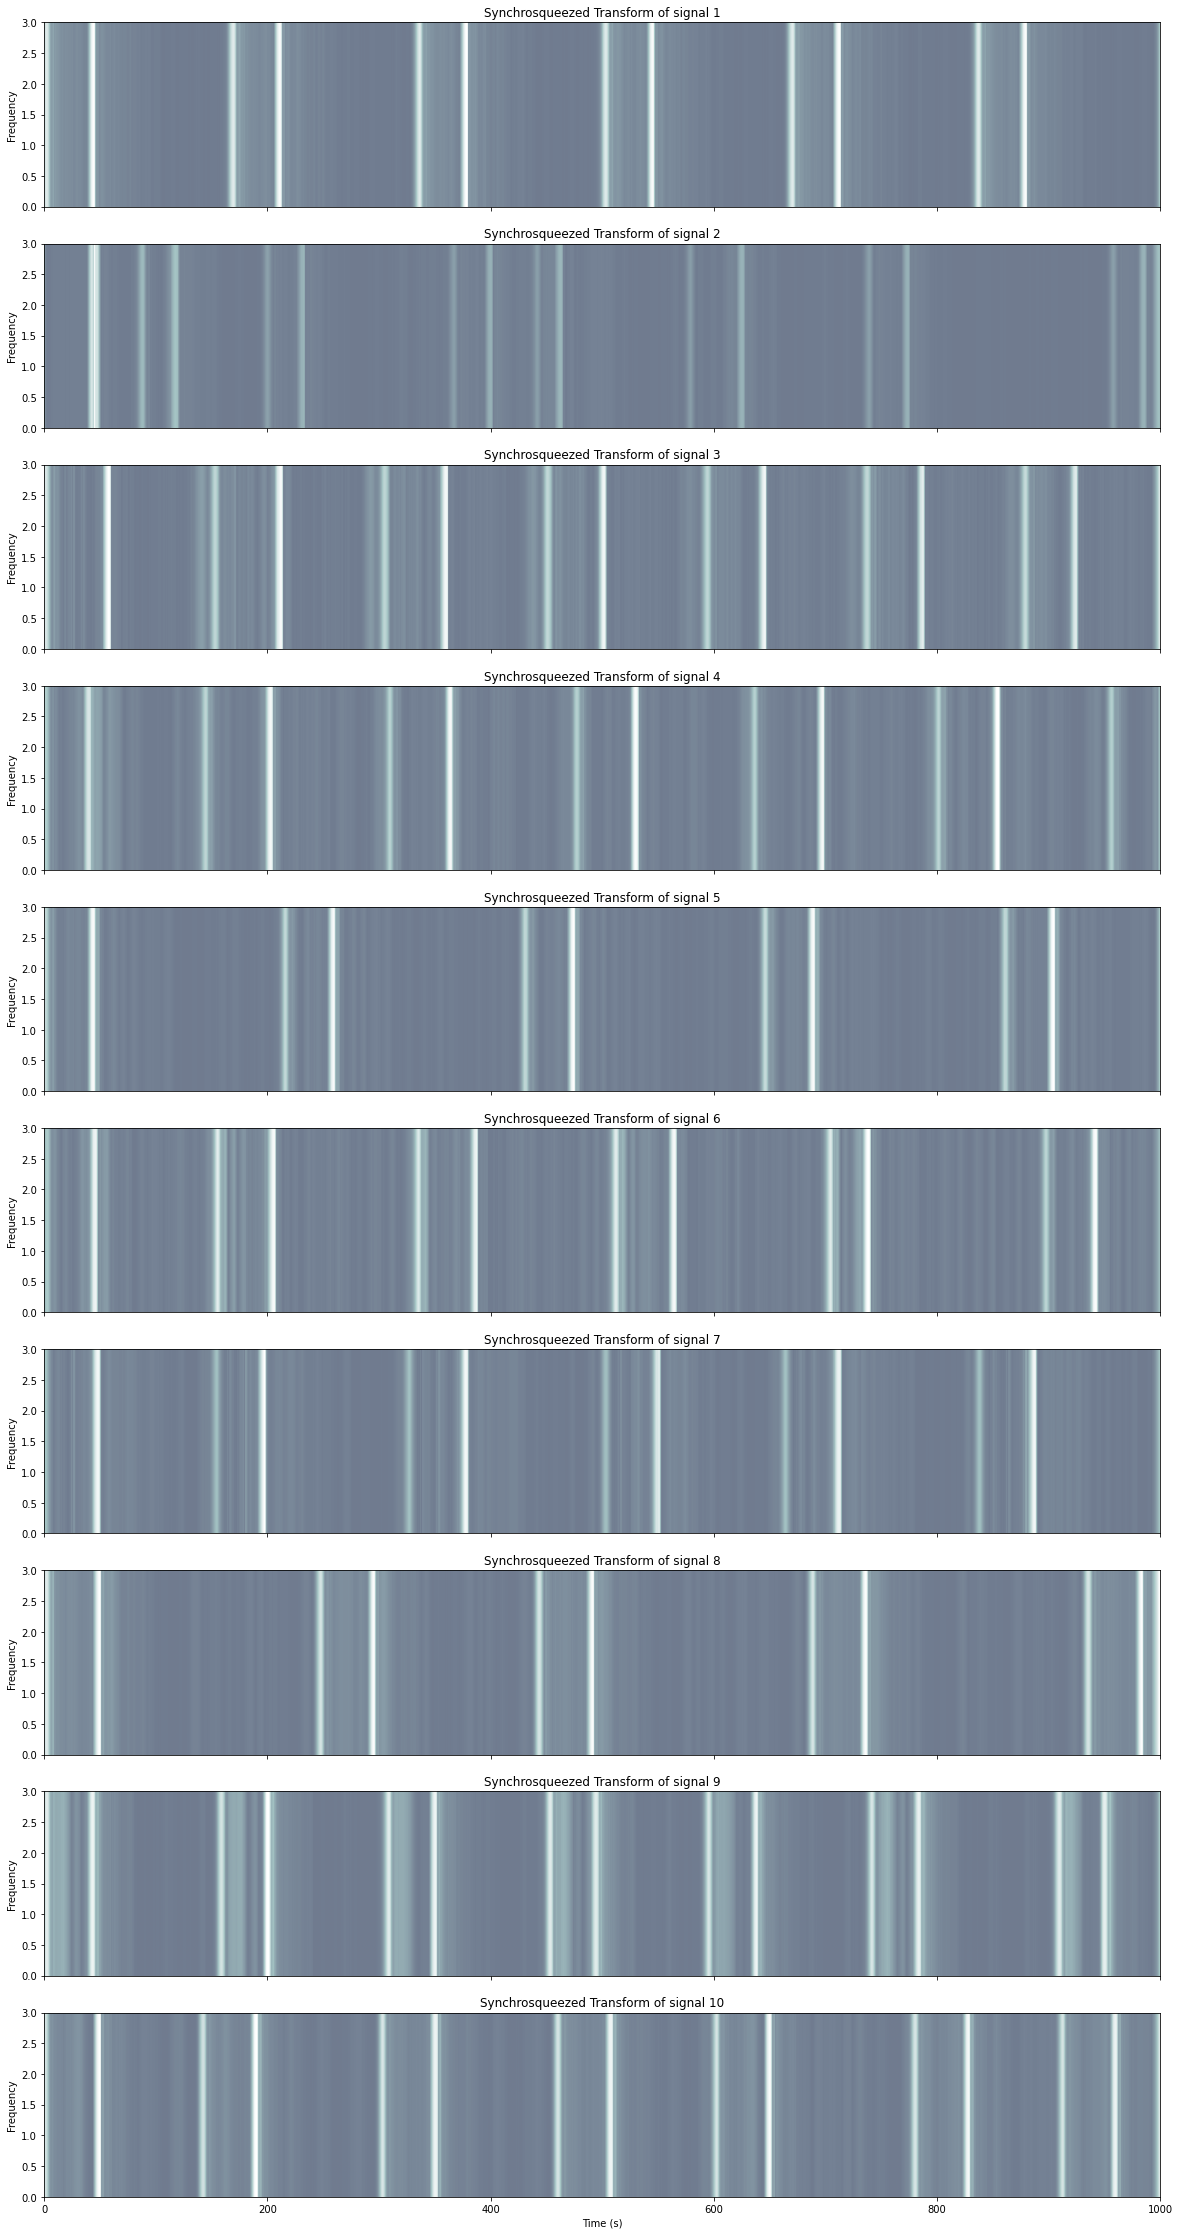

In [ ]:
signals = np.array(flow)
sst = SynchrosqueezedTransform(signals)
sst.perform_sst()
sst.plot_sst()